In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, roc_auc_score)
from sklearn.decomposition import PCA

In [ ]:
df= pd.read_csv('/content/Pharma_Industry.csv')

In [ ]:
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [ ]:
df.isna().sum()

,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(500, 6)

In [ ]:
df.columns

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

In [ ]:
df.dtypes

,0
Drug Dosage (mg),float64
Systolic Blood Pressure (mmHg),float64
Heart Rate (BPM),float64
Liver Toxicity Index (U/L),float64
Blood Glucose Level (mg/dL),float64
Drug Response,int64


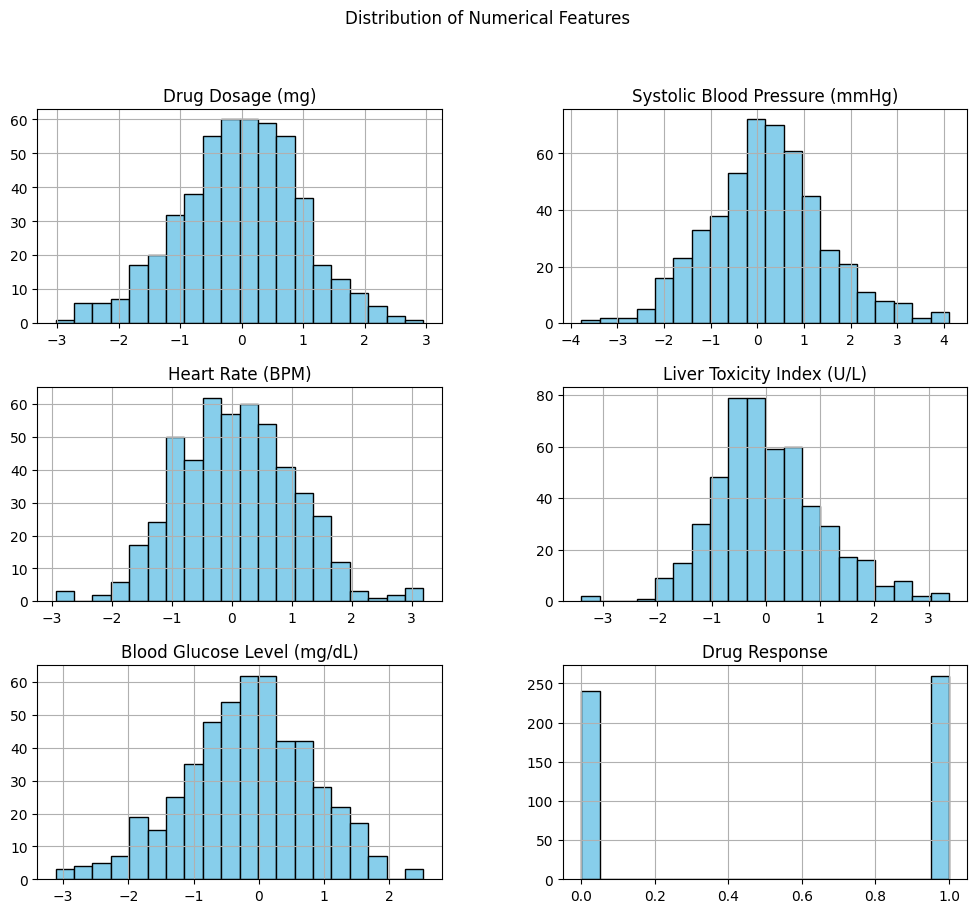

In [ ]:
# Histograms
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

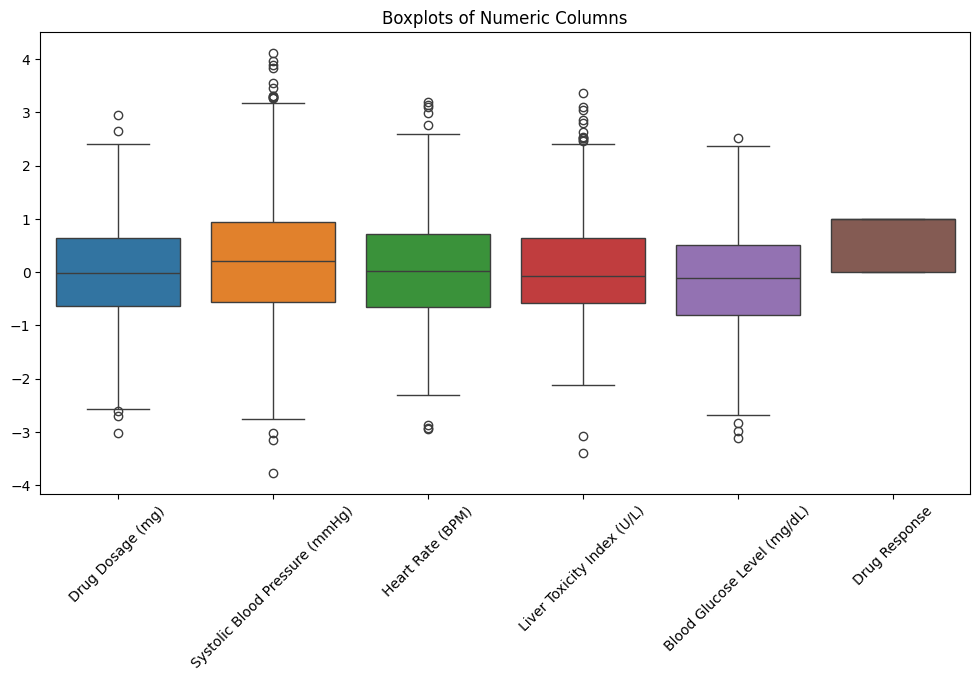

In [ ]:
# Boxplots for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45)
plt.show()

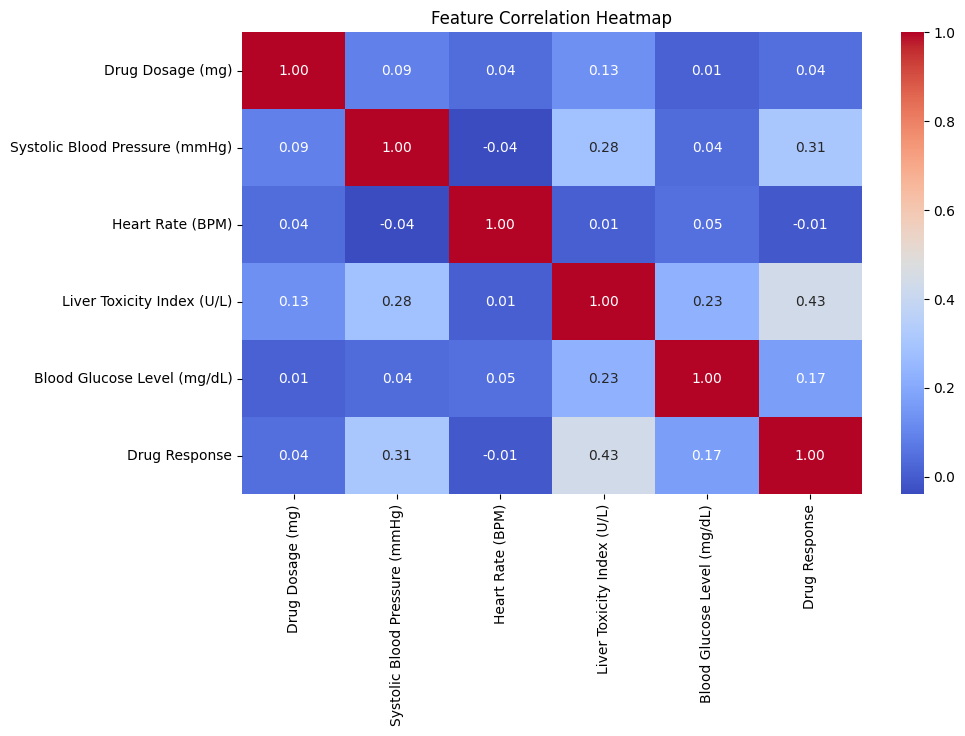

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

2: Data Preprocessing

In [ ]:
features= df.drop(columns='Drug Response')
target= df['Drug Response']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 5)
(100, 5)
(400,)
(100,)


In [ ]:
# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

3: Data Visualization

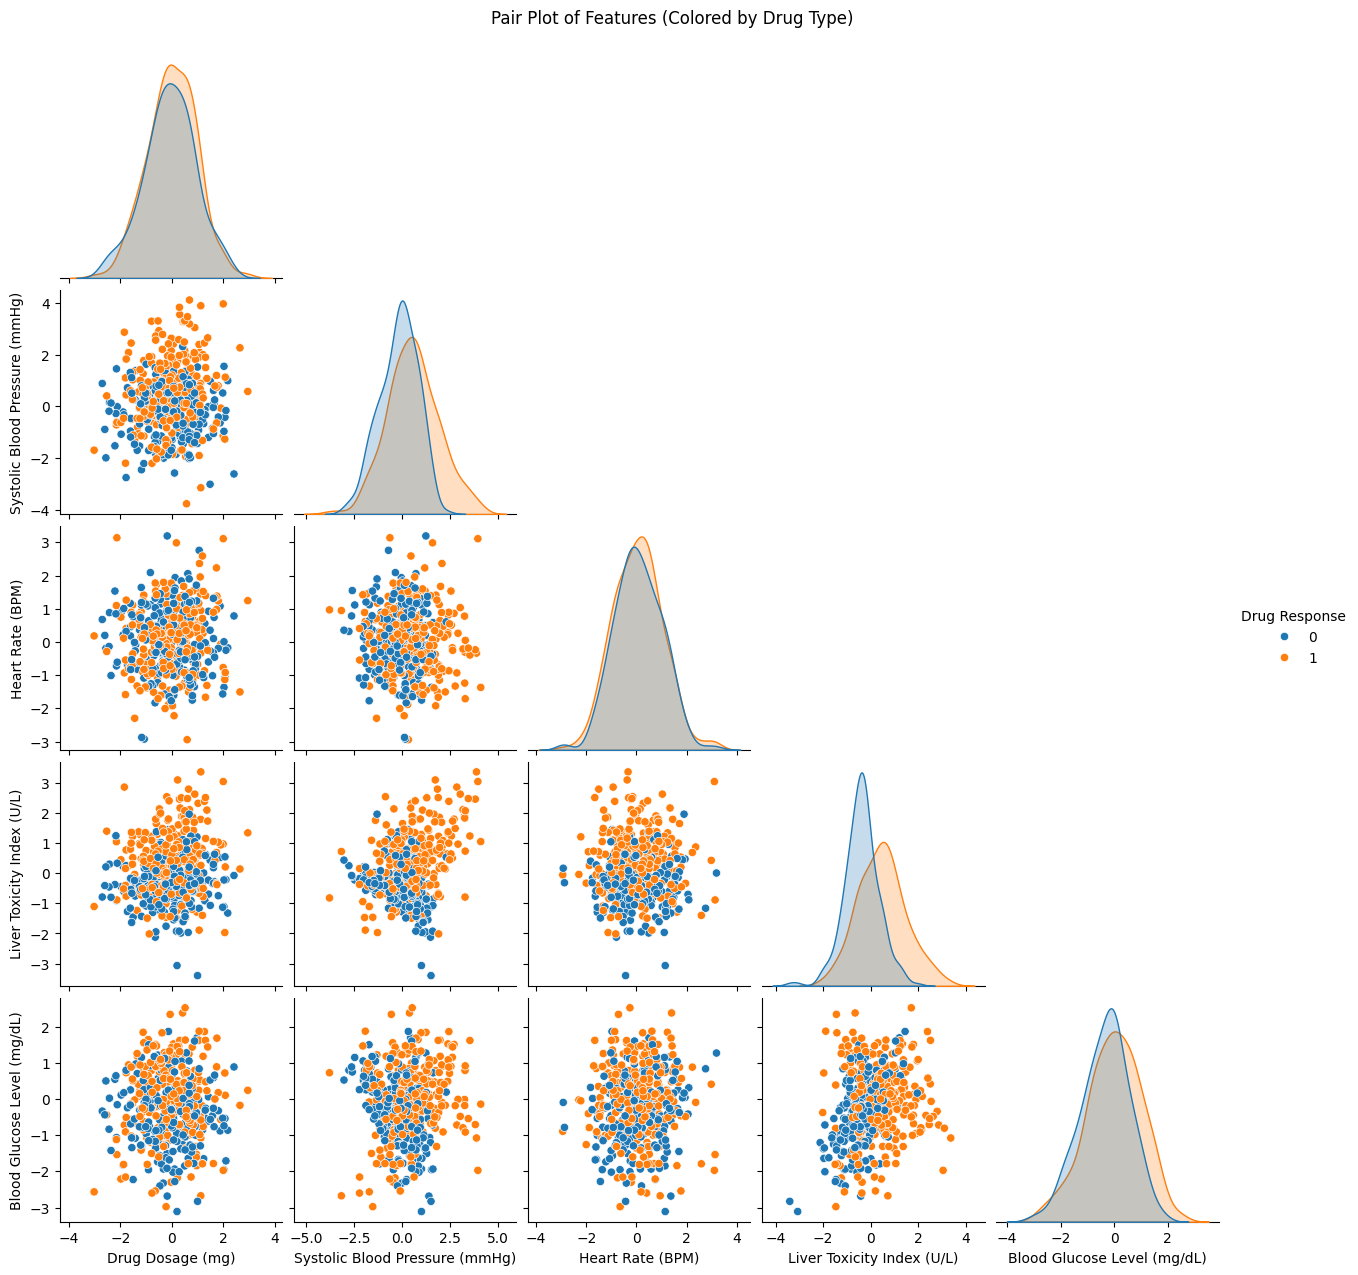

In [ ]:
# Pairplots
sns.pairplot(df, hue='Drug Response', diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Features (Colored by Drug Type)", y=1.02)
plt.show()

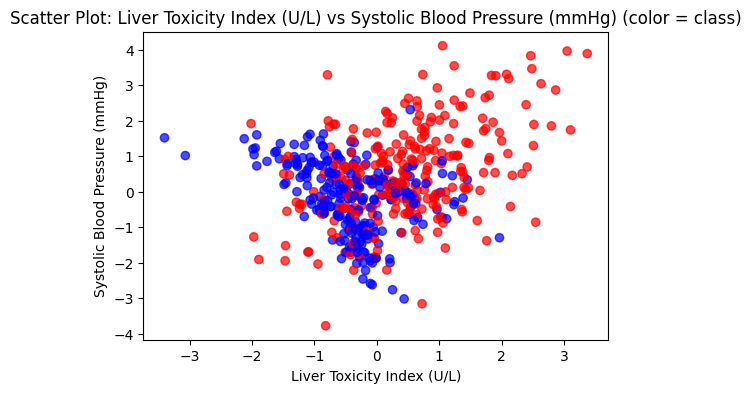

In [ ]:
# Scatter plot
x_col = "Liver Toxicity Index (U/L)"
y_col = "Systolic Blood Pressure (mmHg)"

plt.figure(figsize=(6,4))
plt.scatter(df[x_col], df[y_col], c=df['Drug Response'].astype('category').cat.codes, cmap='bwr', alpha=0.7)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Scatter Plot: {x_col} vs {y_col} (color = class)")
plt.show()

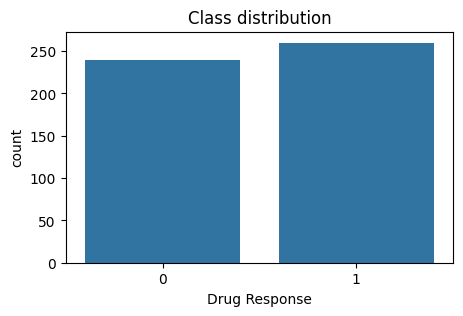

In [ ]:
# Class distribution plot
plt.figure(figsize=(5,3))
sns.countplot(x=target)
plt.title("Class distribution")
plt.show()

4: SVM Implementation

In [ ]:
# Initialize SVM
svm_model = SVC(kernel='linear', random_state=42)

In [ ]:
# Train
svm_model.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predict
y_pred = svm_model.predict(x_test_scaled)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78
Precision: 0.84
Recall: 0.75
F1-score: 0.7924528301886793

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



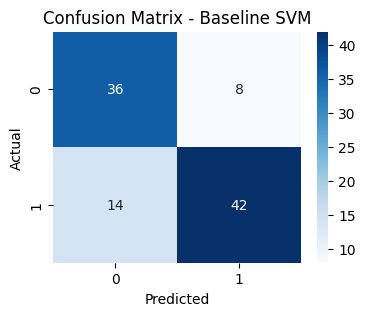

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline SVM")
plt.show()

5: Visualization of SVM Results

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_test_scaled)

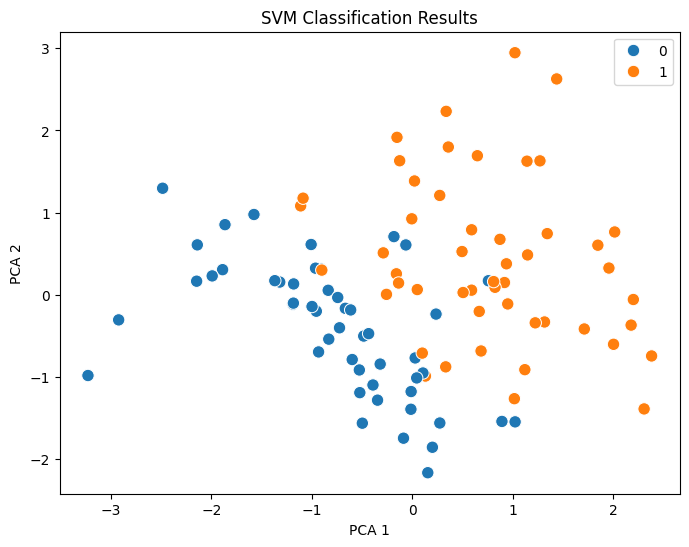

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y_pred, s=80)
plt.title("SVM Classification Results")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

6: Parameter Tuning and Optimization

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.7300000000000001


7: Comparison and Analysis

In [ ]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(x_train_scaled, y_train)
    pred = model.predict(x_test_scaled)
    print(f"Kernel: {k} → Accuracy: {accuracy_score(y_test, pred):.3f}")


Kernel: linear → Accuracy: 0.780
Kernel: poly → Accuracy: 0.710
Kernel: rbf → Accuracy: 0.840
